In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r"C:\Users\GOLLA RAVI TEJA\Downloads\data.xlsx")

In [4]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [5]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [6]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [7]:
df.shape

(3998, 38)

In [8]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
df.describe(include="all")

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,3998,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,NaN,NaN,NaN,67,419,339,2,NaN,NaN,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,present,software engineer,Bangalore,m,NaN,NaN,cbse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1875,539,627,3041,NaN,NaN,1395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,NaN,NaN,NaN,NaN,1990-12-06 06:01:15.637819008,77.925443,NaN,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,43.000000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,NaN,NaN,NaN,NaN,1989-11-16 06:00:00,71.680000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,NaN,NaN,NaN,NaN,1991-03-07 12:00:00,79.150000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,NaN,NaN,NaN,NaN,1992-03-13 18:00:00,85.670000,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,97.760000,NaN,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [11]:
df.describe(include="number")

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [12]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [13]:
col=list(df.drop(columns=['ID','CollegeID','CollegeCityID'],axis=1).select_dtypes(include='number').columns) ## We are not considering ID's since they don't have any meaning or relation to make analysis on the data.


In [14]:
col

['Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [19]:
out_dict={}
for i in col:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower) | (df[i] > upper)]
    out_dict[i]=outliers

In [18]:
len_out={}
for i in col:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower) | (df[i] > upper)]
    len_out[i]=len(outliers)

In [31]:
out_dict['collegeGPA']


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
7,912934,400000.0,7/1/14 0:00,7/1/15 0:00,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,cbse,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.1459,1.2470
138,964319,195000.0,10/1/14 0:00,1/1/15 0:00,business development managerde,coimbatore,m,5/4/91 0:00,79.60,matriculation,...,284,-1,-1,-1,-1,0.8463,0.7119,0.4711,1.1601,0.4805
788,249853,180000.0,5/1/12 0:00,6/1/13 0:00,electrical project engineer,Jowai,m,1/12/89 0:00,66.50,cbse,...,-1,-1,-1,-1,-1,0.5100,-0.2793,-1.0697,0.1798,-1.0774
1419,1262900,180000.0,10/1/14 0:00,4/1/15 0:00,java software engineer,Chennai,m,6/14/93 0:00,58.90,state board,...,376,-1,-1,-1,-1,1.8517,0.2124,0.6248,-1.7556,-0.4776
1439,299447,360000.0,8/1/11 0:00,present,assistant professor,AM,m,12/11/88 0:00,73.06,nagpur board,...,-1,473,-1,-1,260,-2.7357,-2.3073,-0.7794,0.4148,-1.5513
1767,813008,180000.0,6/1/14 0:00,8/1/14 0:00,it technician,Bhopal,m,9/21/92 0:00,69.00,state board,...,-1,446,-1,-1,-1,1.9953,-0.9531,-1.6807,-0.8682,-0.8608
2151,262814,145000.0,2/1/12 0:00,4/1/13 0:00,web developer,New Delhi,m,6/18/88 0:00,61.30,up board,...,-1,-1,-1,-1,-1,-1.0355,0.6568,0.9623,1.4724,0.8183
2229,868740,240000.0,1/1/15 0:00,4/1/15 0:00,product development engineer,Chennai,m,5/1/92 0:00,94.40,state board,...,-1,376,-1,-1,-1,0.4155,-0.6201,0.0100,-0.6147,-0.4776
2293,407736,490000.0,10/1/12 0:00,12/1/14 0:00,software engineer,-1,f,3/18/90 0:00,89.60,karnataka board,...,-1,-1,-1,-1,-1,1.1283,1.4368,-0.7068,-1.7004,0.1864
2662,240465,470000.0,7/1/11 0:00,3/1/15 0:00,systems engineer,Kolkata,m,2/15/90 0:00,77.38,west bengal board of secondary examination (wb...,...,-1,-1,-1,-1,-1,-0.4173,-1.6833,0.5269,-1.7004,-0.9194


In [22]:
repl=['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']


In [21]:
repl

['ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg']

In [23]:
for i in repl:
    df[i]=df[i].replace(-1,np.nan)

In [24]:
out_dict['GraduationYear']['GraduationYear'].iloc[0]


0

In [25]:
df=df[df['GraduationYear']>0]


In [26]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,NaN,NaN,NaN,NaN,NaN,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,NaN,NaN,NaN,NaN,NaN,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,NaN,NaN,NaN,NaN,NaN,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438.0,NaN,NaN,NaN,NaN,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [27]:
len(df[df['collegeGPA']<=10])


12

In [28]:
len(df[df['collegeGPA']>10])


3985

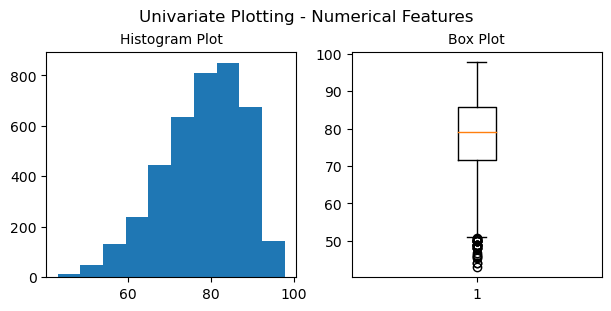

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout="constrained")
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].hist(df["10percentage"])
axs[0].set_title("Histogram Plot", fontsize="medium")

axs[1].boxplot(df["10percentage"])
axs[1].set_title("Box Plot", fontsize="medium")

plt.show()


In [44]:
#!pip install fuzzywuzzy

In [32]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word,choices=['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
                                                 'Hyderabad', 'Noida', 'Kolkata', 'Pune','N/A','Jhansi',
                                                 'Bhubaneswar', 'Mumbai', 'New Delhi',
                                                 'Mangalore', 'Rewari', 'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot',
                                                 'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram', 'Panchkula',
                                                 'Coimbatore', 'Dhanbad', 'Lucknow', 'Gandhinagar', 'Una', 'Daman and Diu',
                                                 'Nagpur', 'Bhagalpur', 'New Delhi/Jaisalmer', 'Ahmedabad', 'Kochi/Cochin',
                                                 'Bankura', 'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
                                                 'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Bulandshahar',
                                                 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
                                                 'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Dharamshala',
                                                 'Hissar', 'Ranchi', 'Madurai', 'Chandigarh', 'Australia', 'Cheyyar', 'Sonipat',
                                                 'Jagdalpur', 'Angul', 'Baroda', ' Ariyalur', 'Jowai','Kochi/Cochin, Chennai and Coimbatore',
                                                 'Neemrana', 'Tirupati', 'Calicut', 'Dubai', 'Ahmednagar', 'Nashik', 'Bellary', 'Ludhiana', 'Muzaffarnagar',
                                                 'Gagret', 'Indirapuram, Ghaziabad','Gwalior', 'Chennai & Mumbai', 'Rajasthan', 'Bareli',
                                                 'Hospet', 'Miryalaguda', 'Dharuhera', 'Meerut', 'Dehradun', 'Ganjam', 'Hubli',
                                                 'Agra', 'Trichy', 'Kudankulam , Tarapur', 'Ongole', 'Sambalpur', 'Pondicherry',
                                                 'Sadulpur', 'Bikaner', 'Vadodara', 'India', 'Asansol',
                                                 'Tirunelvelli', 'Ernakulam', 'Bilaspur', 'Chandrapur', 'Nanded','Dharmapuri', 'Vandavasi', 'Rohtak',
                                                 'Patna','Salem','Technopark, Thiruvananthapuram', 'Bharuch', 'Tornagallu', 'Jaspur', 'Burdwan',
                                                 'Shimla', 'Jammu', 'Shahdol','Muvattupuzha', 'Al Jubail', 'Kalmar, Sweden','Secunderabad',
                                                 'Ratnagiri', 'Jhajjar', 'Gulbarga', 'Nalagarh', 'Jeddah', 'Jamnagar', 'Gonda',
                                                 'Odisha', 'Kharagpur', 'Navi Mumbai , Hyderabad', 'Joshimath', 'Bathinda', 'Johannesburg', 'Kala Amb',
                                                 'Karnal','London', 'Kota', 'Baddi', 'Nagari', 'Mettur', 'Durgapur', 'Bahadurgarh',
                                                 'Rayagada, Odisha', 'Kakinada', 'Surat', 'Kurnool', 'Kolhapur', 'Bhilai', 'Nellore', 'Meerut',
                                                 'Sahibabad', 'Howrah', 'Trichur', 'Ambala', 'Khopoli', 'Kerala', 'Roorkee', 'Allahabad',
                                                 'Delhi/NCR', 'Jalandhar', 'Manesar', 'Vapi', 'Pilani', 'Ras Al Khaimah', 'Bihar', 'Singaruli', 'Mohali',
                                                 'Phagwara', 'Baripada', 'Yamunanagar', 'Shahibabad', 'Sampla', 'Guwahati', 'Rourkela', 'Vellore', 'Dausa',
                                                 'Latur', 'Mainpuri', 'Rae Bareli', 'Dammam', 'Haldia', 'Patiala', 'Gorakhpur',
                                                 'Karad', 'Rajpura', 'Haryana'], threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

ModuleNotFoundError: No module named 'fuzzywuzzy'

In [33]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [34]:
Univariate Analysis
For Numerical Columns


SyntaxError: invalid syntax (1665471966.py, line 1)

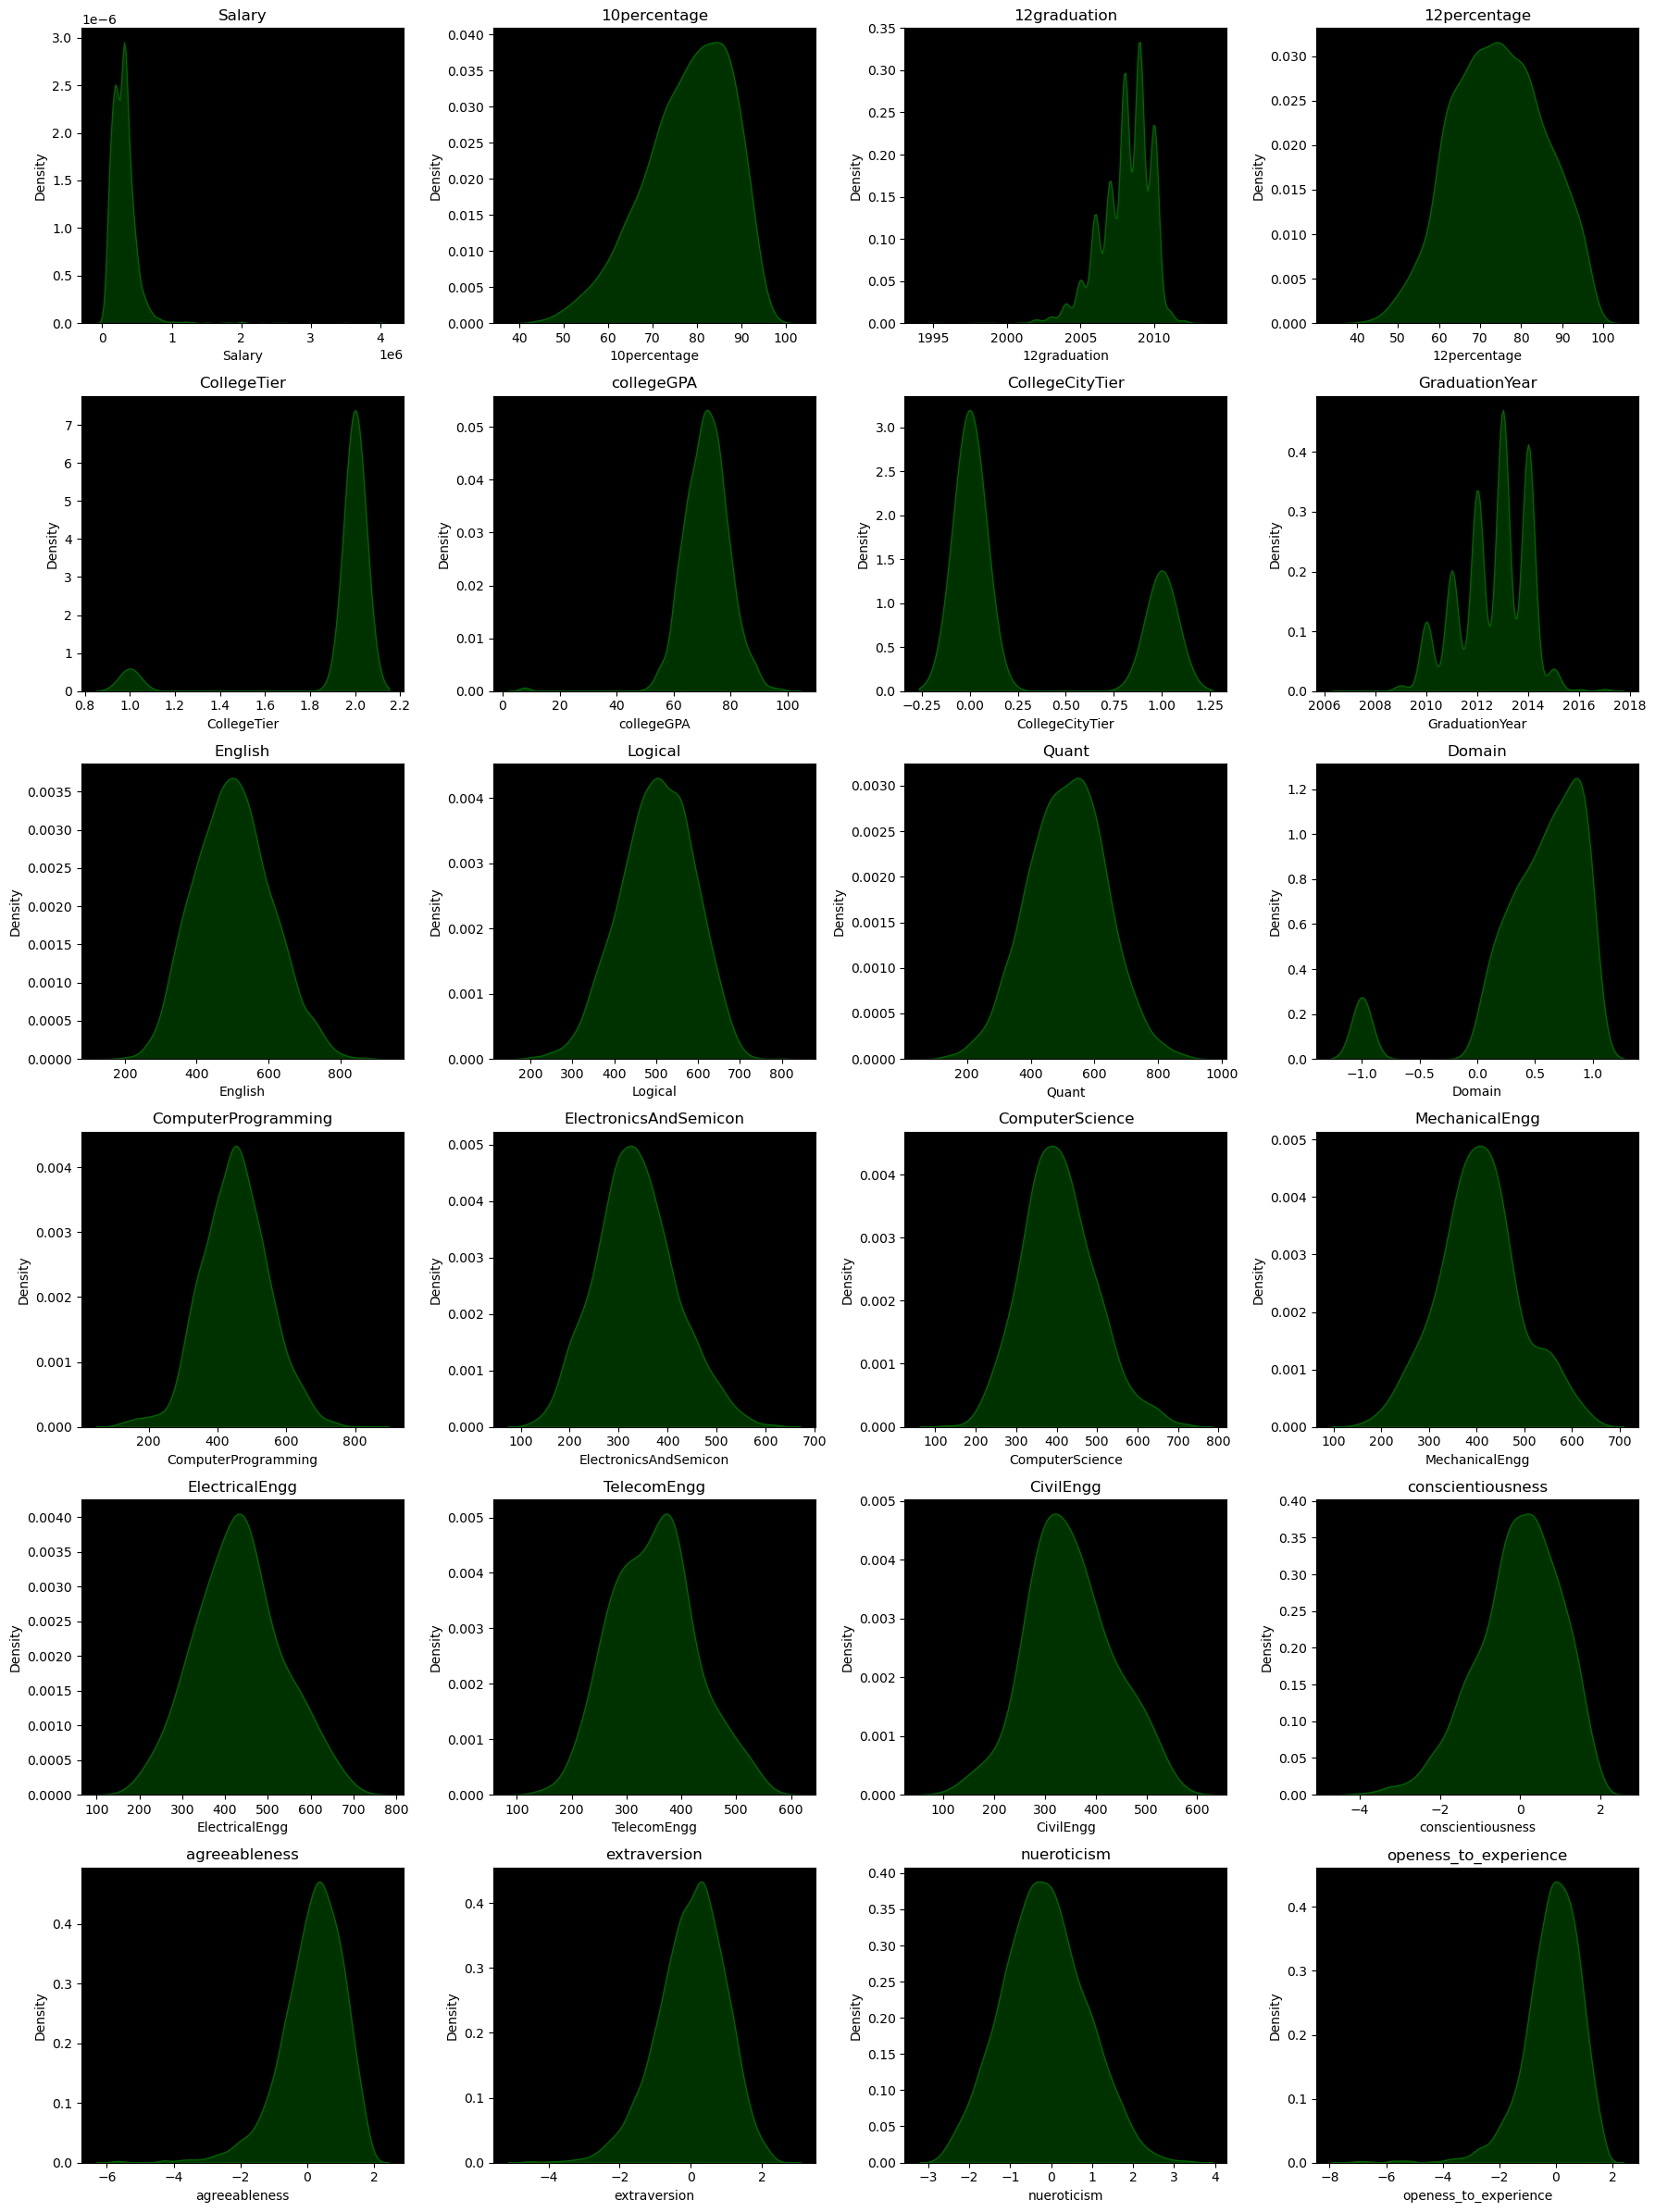

In [38]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
axes = axes.flatten()
for i, column in enumerate(col):
    sns.kdeplot(data=df[column], ax=axes[i], label=column,fill=True, color='darkgreen', alpha=0.5)
    axes[i].set_title(column)  # Set subplot title
    axes[i].set_facecolor('black')
for ax in axes[len(col):]:
    ax.axis('off')
plt.tight_layout()
plt.show()


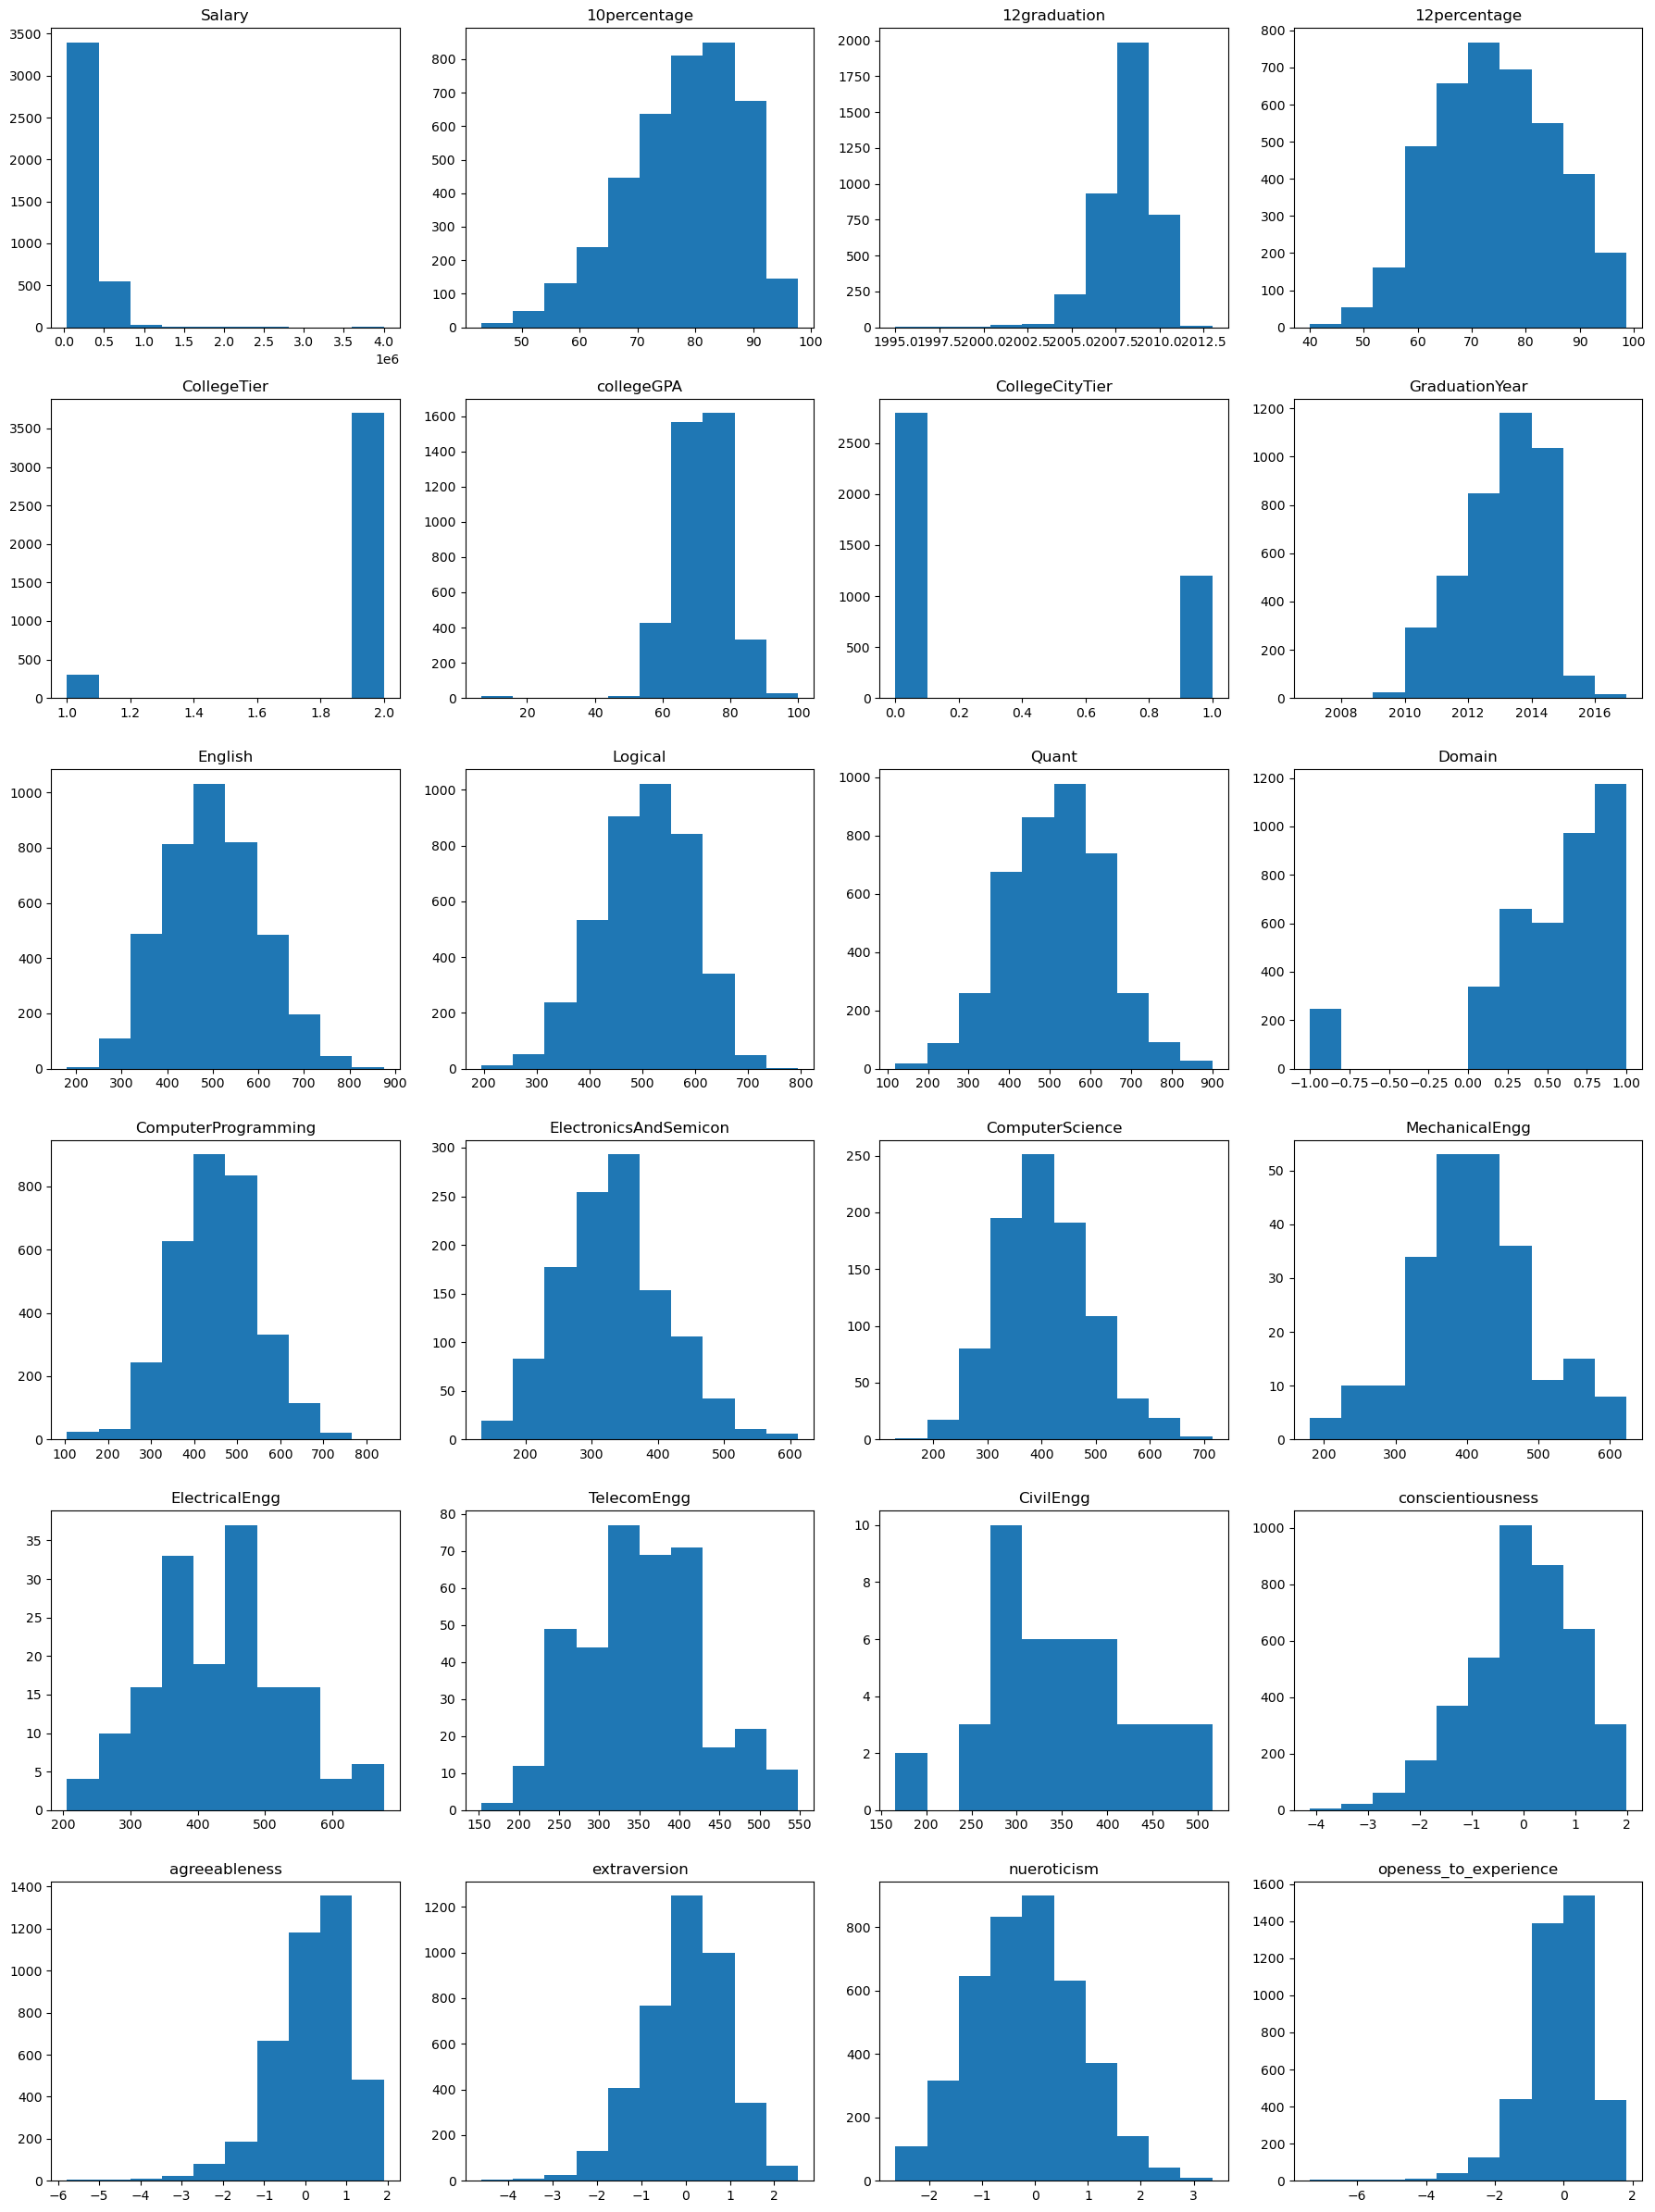

In [40]:
fig, axes = plt.subplots(6, 4, figsize=(18, 24))
axes = axes.flatten()
for i, column in enumerate(col):
    axes[i].hist(df[column], bins=10)
    axes[i].set_title(column)
for ax in axes[len(col):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [41]:
pd.Timestamp.now()

Timestamp('2024-03-05 21:53:30.925297')

In [42]:
df['DOJ']=pd.to_datetime(df['DOJ'])


In [43]:
df['DOJ']

0      2012-06-01
1      2013-09-01
2      2014-06-01
3      2011-07-01
4      2014-03-01
          ...    
3993   2011-10-01
3994   2013-07-01
3995   2013-07-01
3996   2014-07-01
3997   2013-02-01
Name: DOJ, Length: 3997, dtype: datetime64[ns]

In [44]:
df['JobCity'].value_counts(dropna=False)

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

In [45]:
df['JobCity'].value_counts(dropna=False)


JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

In [46]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [47]:
board10=list(df['10board'].unique())


In [48]:
board10

['board ofsecondary education,ap',
 'cbse',
 'state board',
 'mp board bhopal',
 'icse',
 'karnataka secondary school of examination',
 'up',
 'karnataka state education examination board',
 'ssc',
 'kerala state technical education',
 0,
 'bseb',
 'state board of secondary education, andhra pradesh',
 'matriculation',
 'gujarat state board',
 'karnataka state board',
 'wbbse',
 'maharashtra state board',
 'icse board',
 'up board',
 'board of secondary education(bse) orissa',
 'little jacky matric higher secondary school',
 'uttar pradesh board',
 'bsc,orissa',
 'mp board',
 'upboard',
 'matriculation board',
 'j & k bord',
 'rbse',
 'central board of secondary education',
 'pseb',
 'jkbose',
 'haryana board of school education,(hbse)',
 'metric',
 'ms board',
 'kseeb',
 'stateboard',
 'maticulation',
 'karnataka secondory education board',
 'mumbai board',
 'sslc',
 'kseb',
 'board secondary  education',
 'matric board',
 'board of secondary education',
 'west bengal board of seconda

In [49]:
state_10=[]
cbse_10=[]
icse_10=[]
for i in board10:
    if i in ('cbse','cbse[gulf_zone]','cbse ','cbsc','new delhi','board of secondary education'):
        cbse_10.append(i)
    elif i in ('icse','icse board','cicse'):
        icse_10.append(i)
    else:
        state_10.append(i)

<Axes: xlabel='Specialization'>

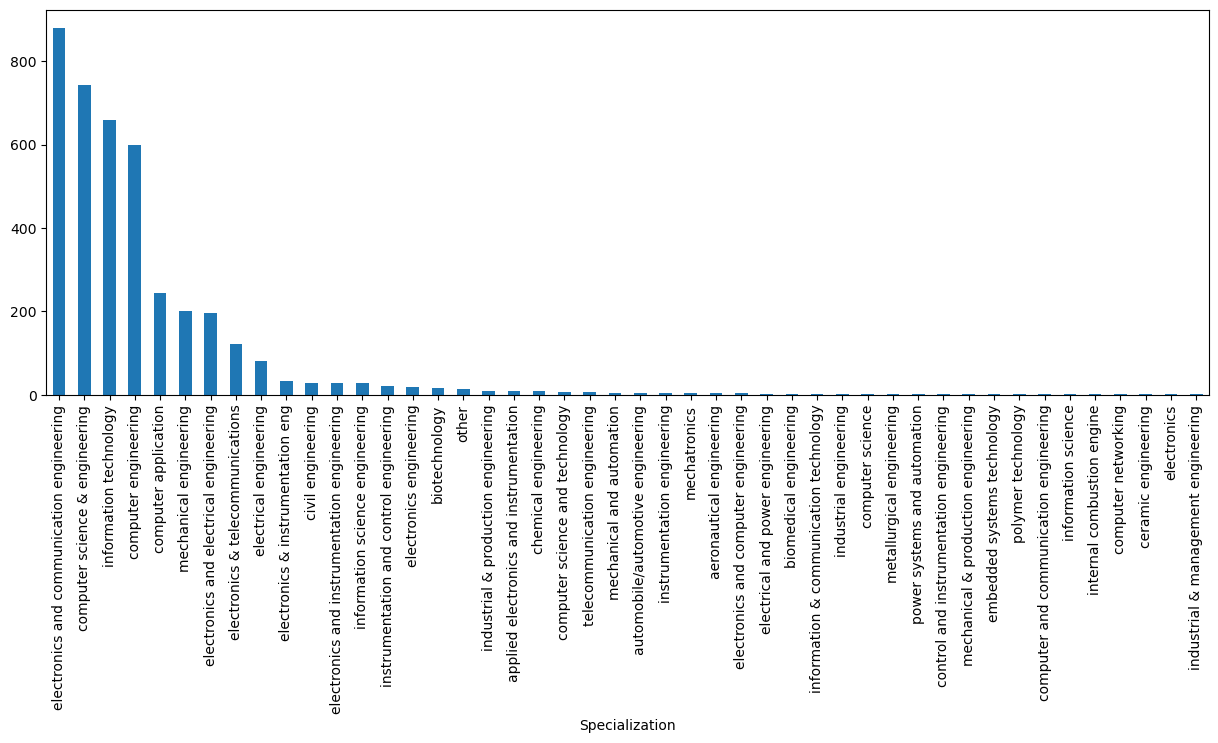

In [50]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

<Axes: xlabel='Specialization'>

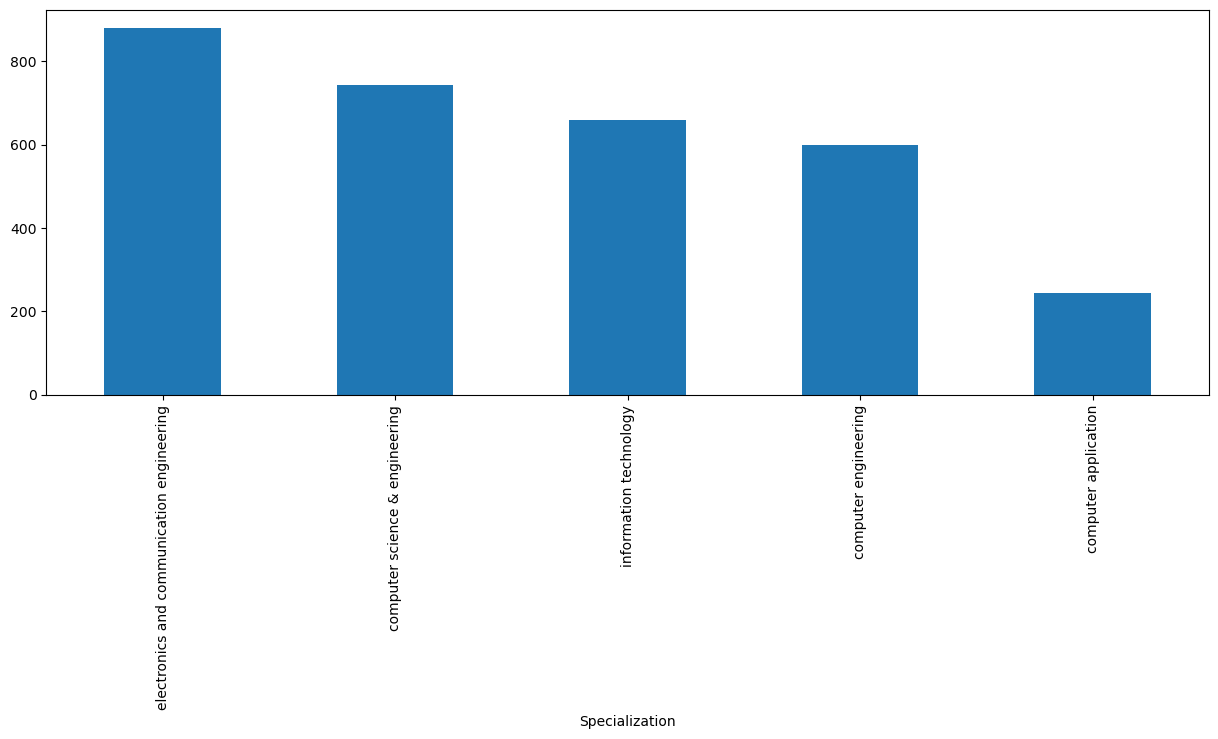

In [51]:
specialization_freq[0:5].plot(kind='bar', figsize=(15,5))

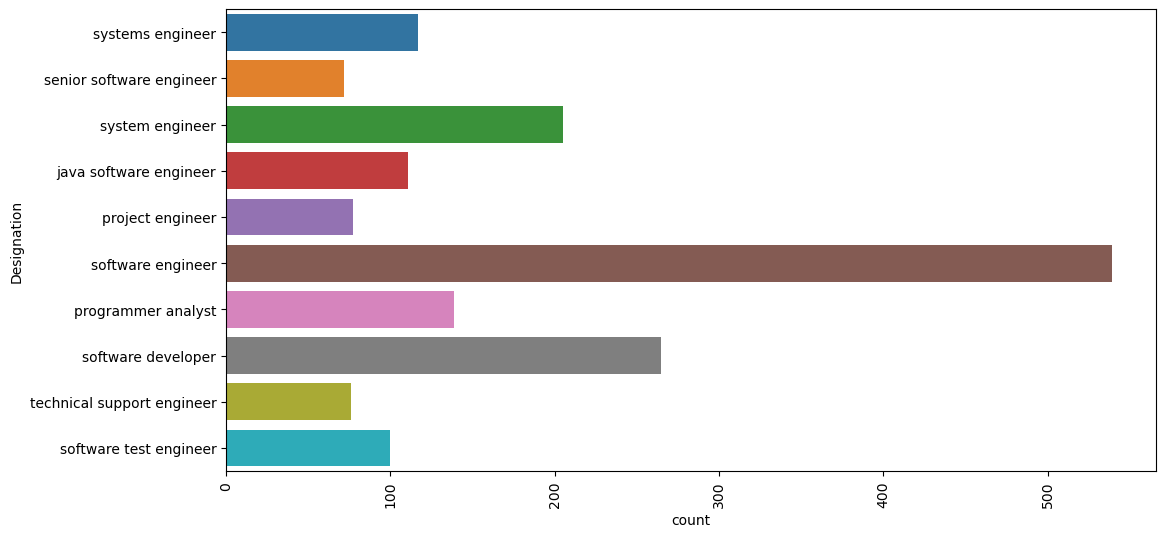

In [52]:
top_values = df['Designation'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(y='Designation', data=df[df['Designation'].isin(top_values)])
plt.xticks(rotation=90)
plt.show()

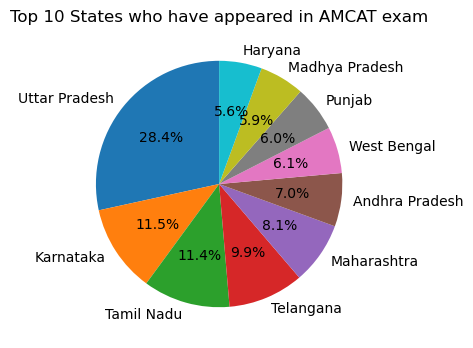

In [53]:
top_values = df['CollegeState'].value_counts().nlargest(10)
plt.figure(figsize=(5,4))
plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 States who have appeared in AMCAT exam')
plt.show()

In [54]:
df.groupby('Gender')['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience'].mean()


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Experience", y="Salary", data=df,palette='magma')

plt.title('Swarm Plot for Salary for people with different Work Experiences')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [55]:
box_city=df[df['JobCity']!='N/A']['JobCity'].value_counts(ascending=False)[0:5].reset_index()


In [56]:
box_city.rename({'index':'JobCity','JobCity':'Count'},inplace=True,axis=1)


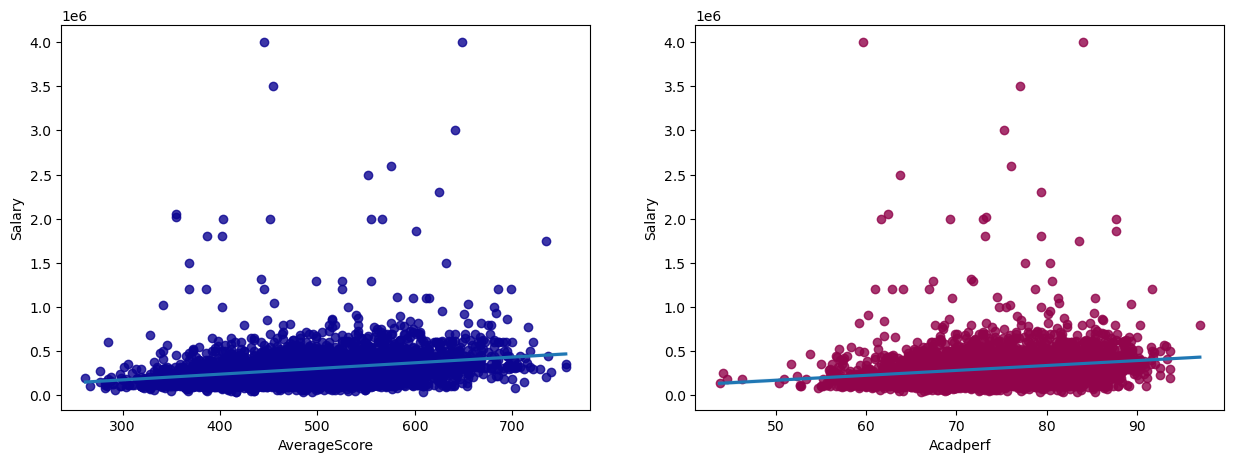

In [57]:
plt.figure(figsize=(15, 5))

# Calculate Average Score and Academic Performance
df['AverageScore'] = (df['Logical'] + df['Quant'] + df['English']) / 3
df['Acadperf'] = (df['10percentage'] + df['12percentage'] + df['collegeGPA']) / 3

# Plotting the regression plots with color
plt.subplot(1, 2, 1)
sns.regplot(x='AverageScore', y='Salary', data=df, scatter_kws={"color": "#0b0491"})
plt.subplot(1, 2, 2)
sns.regplot(x='Acadperf', y='Salary', data=df, scatter_kws={"color": "#91044b"})
plt.show()

In [58]:
df_box=pd.merge(box_city,df,on='JobCity',how='inner')


KeyError: 'JobCity'

In [ ]:
sns.boxplot(x='JobCity', y='Salary', data=df_box)
plt.xlabel('Top 5 Cities')
plt.ylabel('Salaries')
plt.title('Box Plot')
plt.show()

In [59]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency


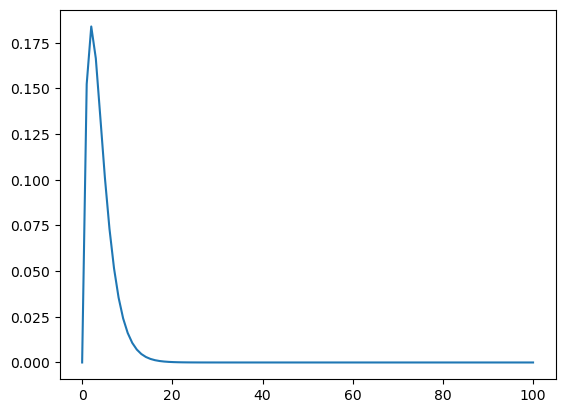

In [60]:
x = np.linspace(0, 100, 100)
y = chi2.pdf(x, df = 4)
plt.plot(x, y)

In [61]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, chi2_dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, chi2_dof)
plt.fill_between(x1, y1, color='green')

NameError: name 'chi2_dof' is not defined

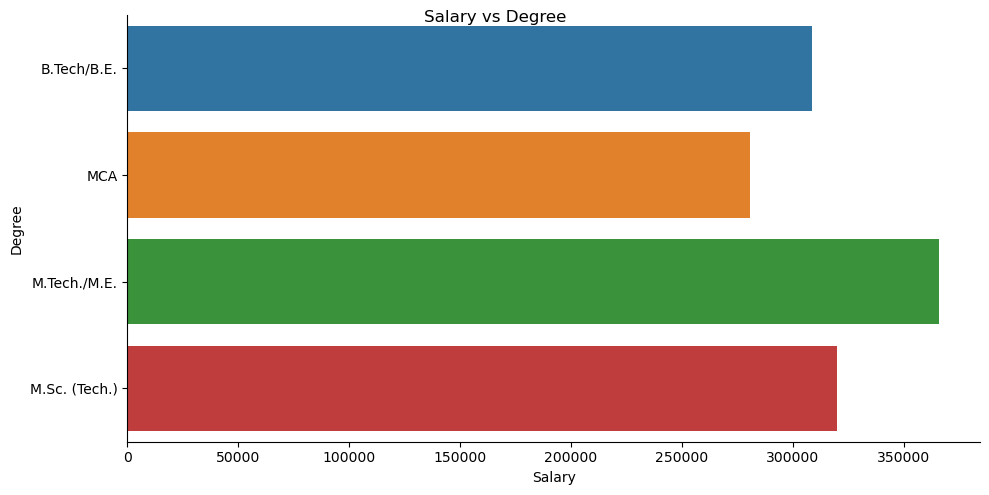

In [62]:
sns.catplot(x='Salary', y='Degree', kind='bar', data=df, ci=None, height=5, aspect=2)
plt.suptitle('Salary vs Degree')
plt.show()